In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_stata("data/GHBR8CFL.DTA")

df.head()



,caseid,bidx,v000,v001,v002,v003,v004,v005,v006,v007,...,s432bz,idx95,s509yf,s509yfd,s509yfm,s509yfy,s509ma,s509mad,s509mam,s509may
0,1 6 2,1,GH8,1,6,2,1,961031,10,2022,...,no,1.0,vaccination date on card,16.0,7.0,2021.0,no,NaN,NaN,NaN
1,1 6 2,2,GH8,1,6,2,1,961031,10,2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1 9 2,1,GH8,1,9,2,1,961031,11,2022,...,no,1.0,no,NaN,NaN,NaN,no,NaN,NaN,NaN
3,1 9 2,2,GH8,1,9,2,1,961031,11,2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1 9 2,3,GH8,1,9,2,1,961031,11,2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34663 entries, 0 to 34662
Columns: 1251 entries, caseid to s509may
dtypes: category(1148), float64(38), int16(18), int32(5), int8(40), object(2)
memory usage: 52.8+ MB


(34663, 1251)

In [5]:
#selecting columns for analysis
df=df[["v012","v201","v213","v139","v149","v106","v107","v149","v155","v501","v525","v511",
    "v312","v190"]]
df

,v012,v201,v213,v139,v149,v106,v107,v149,v155,v501,v525,v511,v312,v190
0,20,2,no or unsure,western,incomplete secondary,secondary,no years completed at level v106,incomplete secondary,cannot read at all,never in union,10,NaN,implants/norplant,middle
1,20,2,no or unsure,western,incomplete secondary,secondary,no years completed at level v106,incomplete secondary,cannot read at all,never in union,10,NaN,implants/norplant,middle
2,31,3,no or unsure,western,incomplete secondary,secondary,1.0,incomplete secondary,cannot read at all,living with partner,18,19.0,implants/norplant,poorer
3,31,3,no or unsure,western,incomplete secondary,secondary,1.0,incomplete secondary,cannot read at all,living with partner,18,19.0,implants/norplant,poorer
4,31,3,no or unsure,western,incomplete secondary,secondary,1.0,incomplete secondary,cannot read at all,living with partner,18,19.0,implants/norplant,poorer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34658,28,3,no or unsure,upper west,incomplete secondary,secondary,3.0,incomplete secondary,able to read whole sentence,no longer living together/separated,19,22.0,not using,poorest
34659,28,3,no or unsure,upper west,incomplete secondary,secondary,3.0,incomplete secondary,able to read whole sentence,no longer living together/separated,19,22.0,not using,poorest
34660,28,3,no or unsure,upper west,incomplete secondary,secondary,3.0,incomplete secondary,able to read whole sentence,no longer living together/separated,19,22.0,not using,poorest
34661,29,1,no or unsure,upper west,no education,no education,NaN,no education,cannot read at all,married,17,23.0,not using,poorest


In [6]:
#renaming columns
df.rename(columns={"v012":"Age", "v201":"Total_children_born", "v213":"Currently_pregnant",
                   "v139":"Region_of_residence", "v149":"Educational_attainment",
                   "v106":"Highest_educational_level", "v107":"Highest_year_of_education",
                   "v155":"Literacy", "v501":"Current_marital_status", "v525":"Age_at_first_sex", 
                   "v511":"Age_at_current_cohabitation", "v312":"Current_contraceptive_method",
                   "v190":"Economical_status"}, inplace=True)
df

,Age,Total_children_born,Currently_pregnant,Region_of_residence,Educational_attainment,Highest_educational_level,Highest_year_of_education,Educational_attainment,Literacy,Current_marital_status,Age_at_first_sex,Age_at_current_cohabitation,Current_contraceptive_method,Economical_status
0,20,2,no or unsure,western,incomplete secondary,secondary,no years completed at level v106,incomplete secondary,cannot read at all,never in union,10,NaN,implants/norplant,middle
1,20,2,no or unsure,western,incomplete secondary,secondary,no years completed at level v106,incomplete secondary,cannot read at all,never in union,10,NaN,implants/norplant,middle
2,31,3,no or unsure,western,incomplete secondary,secondary,1.0,incomplete secondary,cannot read at all,living with partner,18,19.0,implants/norplant,poorer
3,31,3,no or unsure,western,incomplete secondary,secondary,1.0,incomplete secondary,cannot read at all,living with partner,18,19.0,implants/norplant,poorer
4,31,3,no or unsure,western,incomplete secondary,secondary,1.0,incomplete secondary,cannot read at all,living with partner,18,19.0,implants/norplant,poorer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34658,28,3,no or unsure,upper west,incomplete secondary,secondary,3.0,incomplete secondary,able to read whole sentence,no longer living together/separated,19,22.0,not using,poorest
34659,28,3,no or unsure,upper west,incomplete secondary,secondary,3.0,incomplete secondary,able to read whole sentence,no longer living together/separated,19,22.0,not using,poorest
34660,28,3,no or unsure,upper west,incomplete secondary,secondary,3.0,incomplete secondary,able to read whole sentence,no longer living together/separated,19,22.0,not using,poorest
34661,29,1,no or unsure,upper west,no education,no education,NaN,no education,cannot read at all,married,17,23.0,not using,poorest


In [7]:
#introducing an underscore
df.rename(columns={"Currently pregnant":"Currently_pregnant"}, inplace=True)
df

,Age,Total_children_born,Currently_pregnant,Region_of_residence,Educational_attainment,Highest_educational_level,Highest_year_of_education,Educational_attainment,Literacy,Current_marital_status,Age_at_first_sex,Age_at_current_cohabitation,Current_contraceptive_method,Economical_status
0,20,2,no or unsure,western,incomplete secondary,secondary,no years completed at level v106,incomplete secondary,cannot read at all,never in union,10,NaN,implants/norplant,middle
1,20,2,no or unsure,western,incomplete secondary,secondary,no years completed at level v106,incomplete secondary,cannot read at all,never in union,10,NaN,implants/norplant,middle
2,31,3,no or unsure,western,incomplete secondary,secondary,1.0,incomplete secondary,cannot read at all,living with partner,18,19.0,implants/norplant,poorer
3,31,3,no or unsure,western,incomplete secondary,secondary,1.0,incomplete secondary,cannot read at all,living with partner,18,19.0,implants/norplant,poorer
4,31,3,no or unsure,western,incomplete secondary,secondary,1.0,incomplete secondary,cannot read at all,living with partner,18,19.0,implants/norplant,poorer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34658,28,3,no or unsure,upper west,incomplete secondary,secondary,3.0,incomplete secondary,able to read whole sentence,no longer living together/separated,19,22.0,not using,poorest
34659,28,3,no or unsure,upper west,incomplete secondary,secondary,3.0,incomplete secondary,able to read whole sentence,no longer living together/separated,19,22.0,not using,poorest
34660,28,3,no or unsure,upper west,incomplete secondary,secondary,3.0,incomplete secondary,able to read whole sentence,no longer living together/separated,19,22.0,not using,poorest
34661,29,1,no or unsure,upper west,no education,no education,NaN,no education,cannot read at all,married,17,23.0,not using,poorest


In [8]:
#dropping duplicate columns
df.loc[:, ~df.columns.duplicated()]

,Age,Total_children_born,Currently_pregnant,Region_of_residence,Educational_attainment,Highest_educational_level,Highest_year_of_education,Literacy,Current_marital_status,Age_at_first_sex,Age_at_current_cohabitation,Current_contraceptive_method,Economical_status
0,20,2,no or unsure,western,incomplete secondary,secondary,no years completed at level v106,cannot read at all,never in union,10,NaN,implants/norplant,middle
1,20,2,no or unsure,western,incomplete secondary,secondary,no years completed at level v106,cannot read at all,never in union,10,NaN,implants/norplant,middle
2,31,3,no or unsure,western,incomplete secondary,secondary,1.0,cannot read at all,living with partner,18,19.0,implants/norplant,poorer
3,31,3,no or unsure,western,incomplete secondary,secondary,1.0,cannot read at all,living with partner,18,19.0,implants/norplant,poorer
4,31,3,no or unsure,western,incomplete secondary,secondary,1.0,cannot read at all,living with partner,18,19.0,implants/norplant,poorer
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34658,28,3,no or unsure,upper west,incomplete secondary,secondary,3.0,able to read whole sentence,no longer living together/separated,19,22.0,not using,poorest
34659,28,3,no or unsure,upper west,incomplete secondary,secondary,3.0,able to read whole sentence,no longer living together/separated,19,22.0,not using,poorest
34660,28,3,no or unsure,upper west,incomplete secondary,secondary,3.0,able to read whole sentence,no longer living together/separated,19,22.0,not using,poorest
34661,29,1,no or unsure,upper west,no education,no education,NaN,cannot read at all,married,17,23.0,not using,poorest


In [9]:
#Teenagers
df = df[(df["Age"]==15) | (df["Age"]==16) | (df["Age"]==17) | (df["Age"]==18) | (df["Age"]==19)]
df.reset_index()


,index,Age,Total_children_born,Currently_pregnant,Region_of_residence,Educational_attainment,Highest_educational_level,Highest_year_of_education,Educational_attainment,Literacy,Current_marital_status,Age_at_first_sex,Age_at_current_cohabitation,Current_contraceptive_method,Economical_status
0,109,18,1,no or unsure,western,incomplete secondary,secondary,3.0,incomplete secondary,able to read whole sentence,never in union,17,NaN,not using,richest
1,368,18,2,no or unsure,western,incomplete primary,primary,3.0,incomplete primary,cannot read at all,living with partner,10,18.0,injections,poorer
2,369,18,2,no or unsure,western,incomplete primary,primary,3.0,incomplete primary,cannot read at all,living with partner,10,18.0,injections,poorer
3,413,18,1,no or unsure,western,incomplete secondary,secondary,2.0,incomplete secondary,able to read whole sentence,never in union,15,NaN,not using,poorest
4,414,17,1,no or unsure,not dejure resident,complete primary,primary,6.0,complete primary,cannot read at all,never in union,13,NaN,other traditional,poorer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,34053,18,1,no or unsure,upper west,complete primary,primary,6.0,complete primary,able to read only parts of sentence,married,17,17.0,not using,poorest
352,34233,19,1,no or unsure,upper west,incomplete secondary,secondary,1.0,incomplete secondary,able to read whole sentence,never in union,14,NaN,implants/norplant,poorest
353,34253,18,1,no or unsure,not dejure resident,incomplete secondary,secondary,1.0,incomplete secondary,cannot read at all,living with partner,16,17.0,not using,richer
354,34303,17,1,no or unsure,upper west,incomplete primary,primary,5.0,incomplete primary,able to read only parts of sentence,living with partner,16,16.0,implants/norplant,poorest


In [10]:
#checking for empthy cells
df.isnull().sum()

Age                               0
Total_children_born               0
Currently_pregnant                0
Region_of_residence               0
Educational_attainment            0
Highest_educational_level         0
Highest_year_of_education        54
Educational_attainment            0
Literacy                          0
Current_marital_status            0
Age_at_first_sex                  0
Age_at_current_cohabitation     157
Current_contraceptive_method      0
Economical_status                 0
dtype: int64

In [11]:
#Teenagers who are currently pregnant
df[df["Currently_pregnant"]== "yes"]

,Age,Total_children_born,Currently_pregnant,Region_of_residence,Educational_attainment,Highest_educational_level,Highest_year_of_education,Educational_attainment,Literacy,Current_marital_status,Age_at_first_sex,Age_at_current_cohabitation,Current_contraceptive_method,Economical_status
5477,18,1,yes,greater accra,incomplete secondary,secondary,1.0,incomplete secondary,able to read only parts of sentence,married,16,15.0,not using,poorer
6716,19,1,yes,volta,no education,no education,NaN,no education,cannot read at all,living with partner,16,16.0,not using,middle
14771,19,1,yes,ahafo,complete primary,primary,6.0,complete primary,cannot read at all,married,15,17.0,not using,poorest
21374,18,1,yes,oti,no education,no education,NaN,no education,cannot read at all,married,16,15.0,not using,middle
25175,18,1,yes,savannah,incomplete secondary,secondary,1.0,incomplete secondary,able to read only parts of sentence,living with partner,15,14.0,not using,poorer
28651,19,1,yes,north east,incomplete secondary,secondary,2.0,incomplete secondary,cannot read at all,married,16,14.0,not using,poorest


In [12]:
#checking datatypes
df.dtypes

Age                                 int8
Total_children_born                 int8
Currently_pregnant              category
Region_of_residence             category
Educational_attainment          category
Highest_educational_level       category
Highest_year_of_education       category
Educational_attainment          category
Literacy                        category
Current_marital_status          category
Age_at_first_sex                category
Age_at_current_cohabitation      float64
Current_contraceptive_method    category
Economical_status               category
dtype: object

In [13]:
# Convert column to float (coercing non-numeric values to NaN) and assign back
df["Highest_year_of_education"] = pd.to_numeric(df["Highest_year_of_education"], errors="coerce")
print("dtype after conversion:", df["Highest_year_of_education"].dtype)
print("Number non-numeric -> NaN:", df["Highest_year_of_education"].isna().sum())



dtype after conversion: float64
Number non-numeric -> NaN: 69


C:\Users\User\AppData\Local\Temp\ipykernel_13372\1595170450.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Highest_year_of_education"] = pd.to_numeric(df["Highest_year_of_education"], errors="coerce")


In [14]:
df["Age_at_first_sex"]=pd.to_numeric(df["Age_at_first_sex"], errors="coerce")
print("datatype after conversion:",df["Age_at_first_sex"].dtype)
print("NaN:", df["Age_at_first_sex"].isna().sum())

datatype after conversion: int64
NaN: 0


C:\Users\User\AppData\Local\Temp\ipykernel_13372\4117002443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Age_at_first_sex"]=pd.to_numeric(df["Age_at_first_sex"], errors="coerce")


In [15]:
df.describe(include='all')

,Age,Total_children_born,Currently_pregnant,Region_of_residence,Educational_attainment,Highest_educational_level,Highest_year_of_education,Educational_attainment,Literacy,Current_marital_status,Age_at_first_sex,Age_at_current_cohabitation,Current_contraceptive_method,Economical_status
count,356.000000,356.000000,356,356,356,356,287.000000,356,356,356,356.000000,199.000000,356,356
unique,NaN,NaN,2,17,5,3,NaN,5,4,5,NaN,NaN,10,5
top,NaN,NaN,no or unsure,savannah,incomplete secondary,secondary,NaN,incomplete secondary,cannot read at all,never in union,NaN,NaN,not using,poorest
freq,NaN,NaN,350,40,192,203,NaN,192,174,157,NaN,NaN,244,139
mean,18.084270,1.196629,NaN,NaN,NaN,NaN,3.296167,NaN,NaN,NaN,15.047753,15.663317,NaN,NaN
std,1.003476,0.475412,NaN,NaN,NaN,NaN,1.697206,NaN,NaN,NaN,1.739506,1.726856,NaN,NaN
min,15.000000,1.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,8.000000,10.000000,NaN,NaN
25%,17.000000,1.000000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,14.000000,15.000000,NaN,NaN
50%,18.000000,1.000000,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,15.000000,16.000000,NaN,NaN
75%,19.000000,1.000000,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,16.000000,17.000000,NaN,NaN


In [16]:
df.groupby('Highest_educational_level')['Highest_year_of_education'].mean().round(0)

C:\Users\User\AppData\Local\Temp\ipykernel_13372\3850227890.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Highest_educational_level')['Highest_year_of_education'].mean().round(0)


Highest_educational_level
no education    3.0
primary         5.0
secondary       3.0
higher          NaN
Name: Highest_year_of_education, dtype: float64

In [17]:
# Fill missing Highest_year_of_education with group mean for specified levels
# Make a copy to avoid SettingWithCopyWarning
df = df.copy()

# Inspect unique levels and compute means
print("Unique Highest_educational_level values:")
print(df["Highest_educational_level"].unique())

means = df.groupby('Highest_educational_level')['Highest_year_of_education'].mean().round(0)
print("\nGroup means (Highest_year_of_education):")
print(means)

# Levels to fill
fill_levels = ['no education', 'primary', 'secondary']

# NaNs before
print("\nNaNs before filling (by level):")
print(df[df['Highest_educational_level'].isin(fill_levels)].groupby('Highest_educational_level')['Highest_year_of_education'].apply(lambda x: x.isna().sum()))

# Fill NaNs with corresponding group mean
for lvl in fill_levels:
    if lvl in means.index and pd.notna(means.loc[lvl]):
        val = means.loc[lvl]
        n_before = df[(df['Highest_educational_level']==lvl) & (df['Highest_year_of_education'].isna())].shape[0]
        df.loc[(df['Highest_educational_level']==lvl) & (df['Highest_year_of_education'].isna()), 'Highest_year_of_education'] = val
        n_after = df[(df['Highest_educational_level']==lvl) & (df['Highest_year_of_education'].isna())].shape[0]
        print(f"Filled {n_before - n_after} NaNs for '{lvl}' with mean={val:.2f}")
    else:
        print(f"No mean available for '{lvl}' — skipping")

# NaNs after
print("\nNaNs after filling (by level):")
print(df[df['Highest_educational_level'].isin(fill_levels)].groupby('Highest_educational_level')['Highest_year_of_education'].apply(lambda x: x.isna().sum()))

# Total remaining NaNs in the column
print("\nTotal NaNs remaining in 'Highest_year_of_education':", df['Highest_year_of_education'].isna().sum())

Unique Highest_educational_level values:
['secondary', 'primary', 'no education']
Categories (4, object): ['no education' < 'primary' < 'secondary' < 'higher']

Group means (Highest_year_of_education):
Highest_educational_level
no education    3.0
primary         5.0
secondary       3.0
higher          NaN
Name: Highest_year_of_education, dtype: float64

NaNs before filling (by level):
Highest_educational_level
no education    54
primary          1
secondary       14
higher           0
Name: Highest_year_of_education, dtype: int64
Filled 54 NaNs for 'no education' with mean=3.00
Filled 1 NaNs for 'primary' with mean=5.00
Filled 14 NaNs for 'secondary' with mean=3.00

NaNs after filling (by level):
Highest_educational_level
no education    0
primary         0
secondary       0
higher          0
Name: Highest_year_of_education, dtype: int64

Total NaNs remaining in 'Highest_year_of_education': 0


C:\Users\User\AppData\Local\Temp\ipykernel_13372\2079557387.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = df.groupby('Highest_educational_level')['Highest_year_of_education'].mean().round(0)
C:\Users\User\AppData\Local\Temp\ipykernel_13372\2079557387.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df[df['Highest_educational_level'].isin(fill_levels)].groupby('Highest_educational_level')['Highest_year_of_education'].apply(lambda x: x.isna().sum()))
C:\Users\User\AppData\Local\Temp\ipykernel_13372\2079557387.py:33: FutureWarning: The default of observed=False is deprecated and will be c

In [18]:
# Handling missing values in 'Age_at_current_cohabitation'
Avg_age_cohabitation = df['Age_at_current_cohabitation'].mean().round(0)
print("Average age at current cohabitation:", Avg_age_cohabitation)

df['Age_at_current_cohabitation'].fillna(Avg_age_cohabitation, inplace=True)

Average age at current cohabitation: 16.0


C:\Users\User\AppData\Local\Temp\ipykernel_13372\1555119156.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age_at_current_cohabitation'].fillna(Avg_age_cohabitation, inplace=True)


In [19]:
#
mode_region_res = df['Region_of_residence'].mode()[0]
df['Region_of_residence'].replace("not dejure resident", mode_region_res, inplace=True)


C:\Users\User\AppData\Local\Temp\ipykernel_13372\3828660962.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Region_of_residence'].replace("not dejure resident", mode_region_res, inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_13372\3828660962.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['R

In [20]:
df

,Age,Total_children_born,Currently_pregnant,Region_of_residence,Educational_attainment,Highest_educational_level,Highest_year_of_education,Educational_attainment,Literacy,Current_marital_status,Age_at_first_sex,Age_at_current_cohabitation,Current_contraceptive_method,Economical_status
109,18,1,no or unsure,western,incomplete secondary,secondary,3.0,incomplete secondary,able to read whole sentence,never in union,17,16.0,not using,richest
368,18,2,no or unsure,western,incomplete primary,primary,3.0,incomplete primary,cannot read at all,living with partner,10,18.0,injections,poorer
369,18,2,no or unsure,western,incomplete primary,primary,3.0,incomplete primary,cannot read at all,living with partner,10,18.0,injections,poorer
413,18,1,no or unsure,western,incomplete secondary,secondary,2.0,incomplete secondary,able to read whole sentence,never in union,15,16.0,not using,poorest
414,17,1,no or unsure,savannah,complete primary,primary,6.0,complete primary,cannot read at all,never in union,13,16.0,other traditional,poorer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34053,18,1,no or unsure,upper west,complete primary,primary,6.0,complete primary,able to read only parts of sentence,married,17,17.0,not using,poorest
34233,19,1,no or unsure,upper west,incomplete secondary,secondary,1.0,incomplete secondary,able to read whole sentence,never in union,14,16.0,implants/norplant,poorest
34253,18,1,no or unsure,savannah,incomplete secondary,secondary,1.0,incomplete secondary,cannot read at all,living with partner,16,17.0,not using,richer
34303,17,1,no or unsure,upper west,incomplete primary,primary,5.0,incomplete primary,able to read only parts of sentence,living with partner,16,16.0,implants/norplant,poorest


In [21]:
#check for inconsistent values
df.Currently_pregnant.value_counts()
df.Current_contraceptive_method.value_counts()
df.Current_marital_status.value_counts()
df.Economical_status.value_counts()
df.Literacy.value_counts()
df.Highest_educational_level.value_counts()

Highest_educational_level
secondary       203
primary          98
no education     55
higher            0
Name: count, dtype: int64

In [22]:
#Grouping economical status
df.Economical_status.replace(["poorest", "poorer"], "Poor", inplace=True)
df.Economical_status.replace(["richer", "richest"], "Rich", inplace=True)
df.Economical_status.replace("middle", "Middle", inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_13372\524922393.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Economical_status.replace(["poorest", "poorer"], "Poor", inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_13372\524922393.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df.Economical_status.

In [23]:
var1=df["Economical_status"].value_counts()
var1

Economical_status
Poor      247
Middle     72
Rich       37
Name: count, dtype: int64

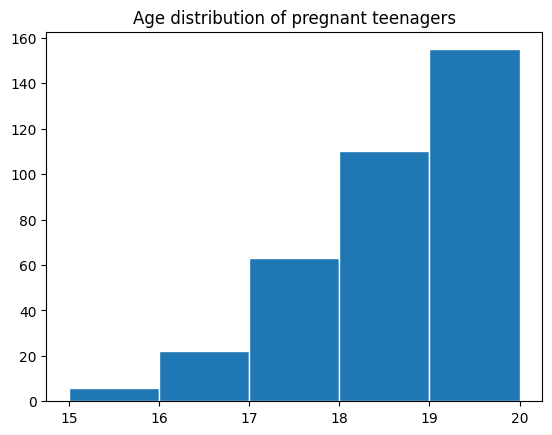

In [33]:
#Age distribution
plt.hist(df["Age"], bins= [15,16,17,18,19,20], edgecolor="white")
plt.title("Age distribution of pregnant teenagers")
plt.show()

Text(0.5, 1.0, 'Economical status of teenagers who ever been pregnant')

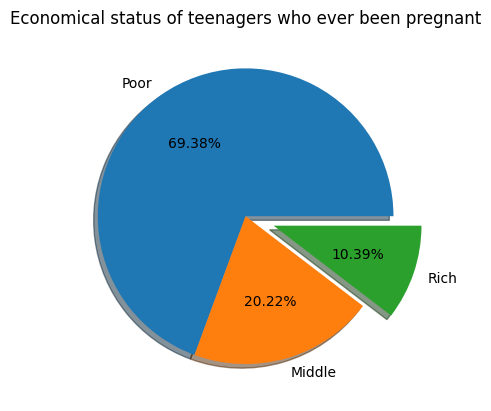

In [25]:
#Pie chart showing economical status of currently pregnant teenagers
plt.pie(var1, labels=var1.index.get_level_values(0), autopct='%1.2f%%', explode=(0,0,0.2), shadow=True)
plt.title("Economical status of teenagers who ever been pregnant")

In [26]:
df[["Age", "Total_children_born"]].corr().values[0][1]

np.float64(0.16592743948374786)

In [27]:
Top_5_Region=df["Region_of_residence"].value_counts().iloc[:5]
Top_5_Region

Region_of_residence
savannah      48
bono east     39
north east    38
ashanti       30
oti           29
Name: count, dtype: int64

In [29]:
bottom_5_Region=df["Region_of_residence"].value_counts().iloc[-6:-1]
bottom_5_Region

Region_of_residence
volta            14
eastern          14
upper east       13
ahafo            13
greater accra    11
Name: count, dtype: int64

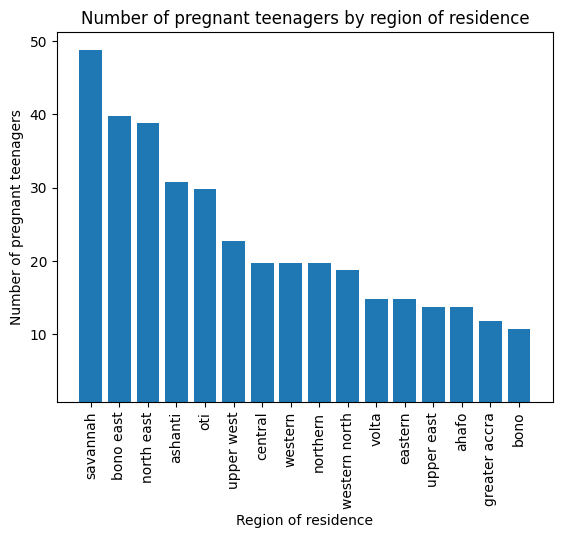

In [ ]:
#showing pregnant teenagers by regions of residence
bar_Top = df["Region_of_residence"].value_counts()
plt.bar(bar_Top.index, bar_Top.values, width=0.8, bottom= 0.8)
plt.xticks(rotation=90)
plt.title("Number of pregnant teenagers by region of residence")
plt.xlabel("Region of residence")
plt.ylabel("Number of pregnant teenagers")
plt.show()